In [1]:
import Data.dataset as ds
import Plots.plots as pl
import Calculations.monte_carlo as mc
import Calculations.calculations as cal

In [2]:
zone1 = ds.get_out1()
zone2 = ds.get_out2()

mass = ('Mass', 'Mass [kg]')
velocity = ('Velocity', 'Velocity [m/s]')
kinetic_energy = ('Kinetic Energy', 'Kinetic Energy [kJ]')
timedelta = ('Timedelta', 'TimeDiffHours')
n_years = 1000000

In [3]:
without_outliers_zone1 = ds.replace_outliers_with_median(zone1)
without_outliers_zone2 = ds.replace_outliers_with_median(zone2)

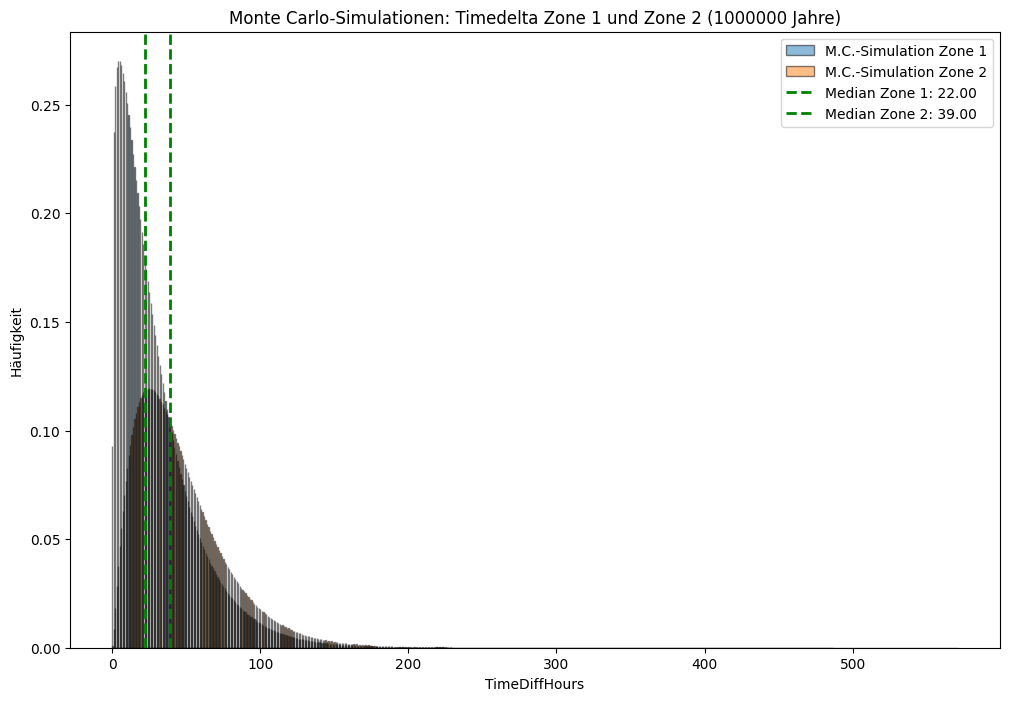

In [4]:
sim_timediff_zone1 = mc.simulate_gamma_distribution_timediff(without_outliers_zone1, n_years, timedelta)
sim_timediff_zone2 = mc.simulate_gamma_distribution_timediff(without_outliers_zone2, n_years, timedelta)

n_simulations_zone1 = len(sim_timediff_zone1)
n_simulations_zone2 = len(sim_timediff_zone2)

pl.show_simulated_data(sim_timediff_zone1, sim_timediff_zone2, timedelta, n_years)

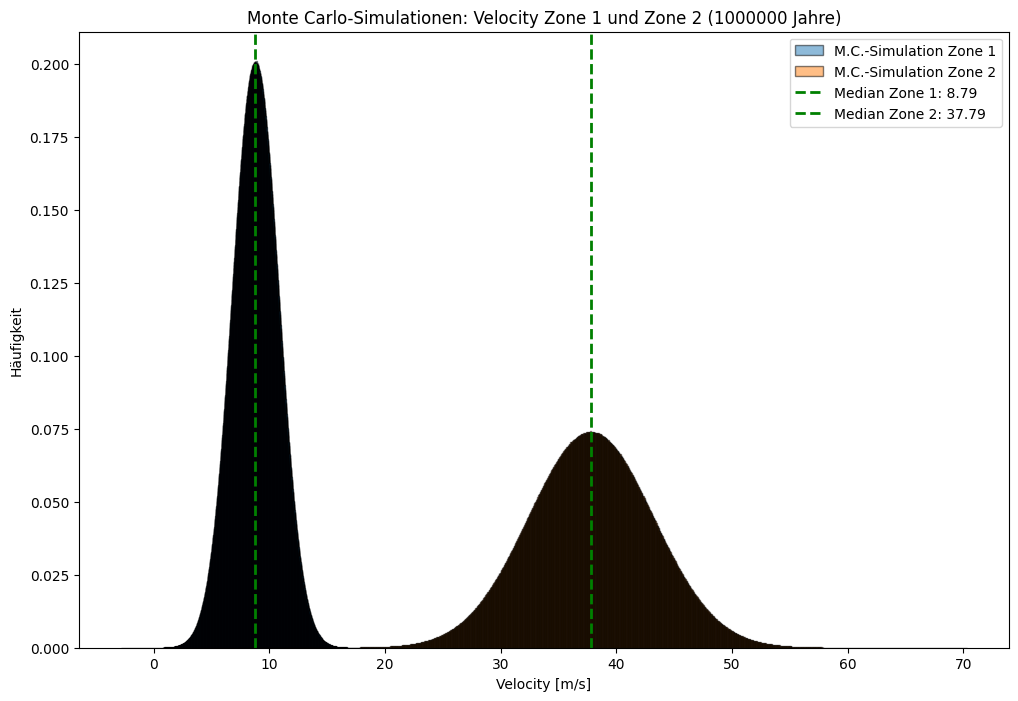

In [5]:
sim_velocity_zone1 = mc.simulate_norm_distribution(without_outliers_zone1, n_simulations_zone1, velocity)
sim_velocity_zone2 = mc.simulate_norm_distribution(without_outliers_zone2, n_simulations_zone2, velocity)

pl.show_simulated_data(sim_velocity_zone1, sim_velocity_zone2, velocity, n_years)

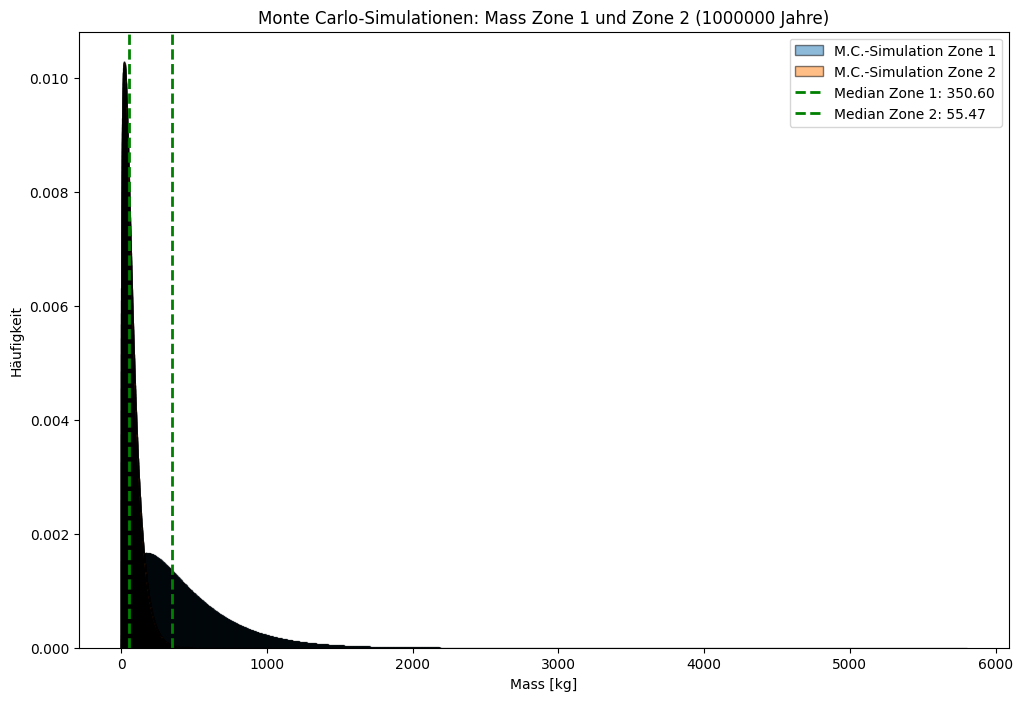

In [6]:
sim_mass_zone1 = mc.simulate_gamma_distribution(without_outliers_zone1, n_simulations_zone1, mass)
sim_mass_zone2 = mc.simulate_gamma_distribution(without_outliers_zone2, n_simulations_zone2, mass)

pl.show_simulated_data(sim_mass_zone1, sim_mass_zone2, mass,n_years)

In [7]:
merged_zone1 = ds.merge_simulated_data(sim_mass_zone1, sim_velocity_zone1, sim_timediff_zone1)

In [8]:
merged_zone2 = ds.merge_simulated_data(sim_mass_zone2, sim_velocity_zone2, sim_timediff_zone2)

In [9]:
sim_rocks_in_net = cal.sim_calculate_cumulative_mass_since_clearing(merged_zone1, merged_zone2)

In [10]:
count = (sim_rocks_in_net['Kinetic Energy [kJ]'] >= ((-0.25*sim_rocks_in_net['CumulativeMassInNet'])+1000)).sum()
print(count, 'Netzbrüche')
net_brake_probability = count / len(sim_rocks_in_net)
print(net_brake_probability*100, '% Netzbruchwahrscheinlichkeit')

11259 Netzbrüche
0.0023399755336946638 % Netzbruchwahrscheinlichkeit


In [11]:
traffic_volume = 1200 #Anzahl Fahrzeuge/Tag
vehicle_length = 4.4  #Meter
vehicle_velocity = 60 #km/h
lethality = 0.1       #Letalität bei 60 km/h
reaction_time = 1     #Sekunden

#Berechnung Todeswahrscheinlichkeit direkter Treffer
t_pass_direct_hit = vehicle_length / (vehicle_velocity / 3.6)
transit_time_direct_hit = traffic_volume * t_pass_direct_hit
direct_hit = (transit_time_direct_hit / 86400) 

#Berechnung Todeswahrscheinlichkeit indirekter Treffer
vehicle_velocity_ms = vehicle_velocity * 0.277778
reaction_distance = vehicle_velocity_ms * reaction_time
break_distance = (vehicle_velocity / 10) ** 2
combined_distance = reaction_distance + break_distance

t_pass_indirect_hit = combined_distance / vehicle_velocity_ms
transit_time_indirect_hit = traffic_volume * t_pass_indirect_hit * lethality
indirect_hit = (transit_time_indirect_hit / 86400) 

overall_death_probability = (direct_hit + indirect_hit) * 1.6 * net_brake_probability
print(overall_death_probability*100, '% Gesamttodeswahrscheinlichkeit')

3.0159675671010136e-05 % Gesamttodeswahrscheinlichkeit
